# 2D Regression with a Single Neuron

We'll implement a script to regress 2D data using a single neuron.

## Load Data

We load the data using the function `load_data()` contained in `loader.py`.

In [8]:
from loader import load_data

(x, y_gt) = load_data(filename="data_reg_2d_clean.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [[ 0.09539425  0.62586094]
 [ 1.38026523  1.66483856]
 [ 0.88323335  1.21737326]
 [ 0.00583365  0.01259322]
 [-0.65958948  0.39365817]
 [-0.15699403  0.54888271]
 [-0.20260499 -0.48191721]
 [-1.04782585  0.34934672]
 [ 1.72214286 -0.10788593]
 [-0.34130321  0.26006667]]
y_gt: [[ 0.7304667 ]
 [ 0.48457333]
 [ 0.53413991]
 [ 0.20675957]
 [ 1.25324765]
 [ 0.90587675]
 [-0.07931222]
 [ 1.59717256]
 [-1.63002878]
 [ 0.80136988]]


## Visualize Data

We visualize the data using the function `plot_data_2d()` contained in `plotting.py`.

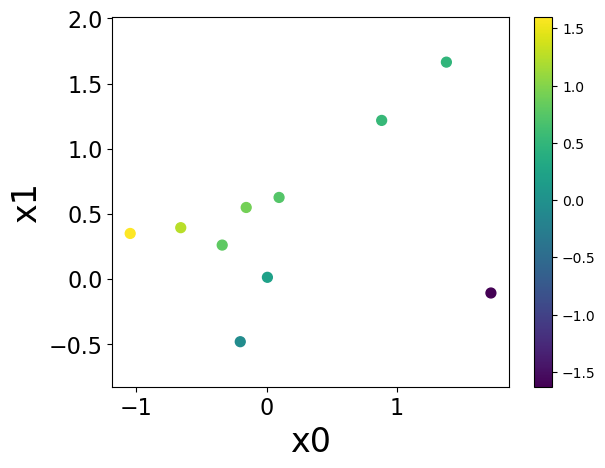

In [9]:
from plotting import plot_data_2d

plot_data_2d(x, y_gt)

## Neuron

We now create a single neuron and randomly initialize it.

In [10]:
from numpy.random import default_rng

rng = default_rng()

w0 = rng.standard_normal()
w1 = rng.standard_normal()

y_p = x @ (w0, w1)

We now plot its predictions using the function `plot_pred_2d` from `plotting.py`.

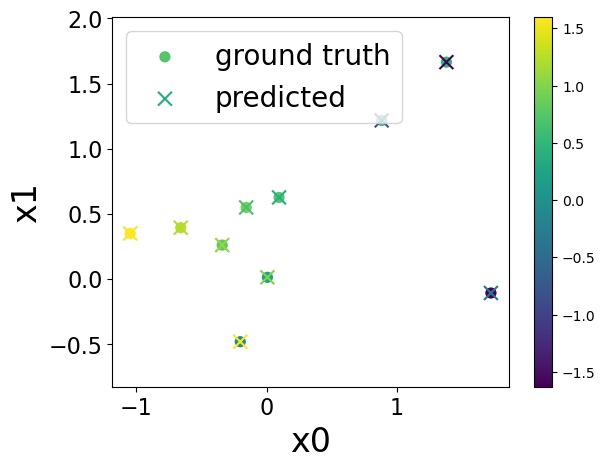

In [11]:

from plotting import plot_pred_2d

plot_pred_2d(x, y_gt, y_p)


## Training

We now train the neuron...

In [12]:
num_samples = len(x)
num_train_iterations = 100
eta = .1 # learning rate

for i in range(num_train_iterations):
	selected = rng.integers(0, num_samples) # select a random sample
	x_selected = x[selected]
	y_gt_selected = y_gt[selected]

	y_p_selected = x_selected @ (w0, w1) # calculate predicted output
	
	error = y_p_selected - y_gt_selected

	w0 -= eta * error * x_selected[0] # update weight w0
	w1 -= eta * error * x_selected[1] # update weight w1

	print(f"i={i} w0={w0[0]:.2f} w0={w1[0]:.2f} error={error[0]:.2f}")

i=0 w0=-0.44 w0=-0.37 error=-1.08
i=1 w0=-0.31 w0=-0.21 error=-1.37
i=2 w0=-0.39 w0=-0.16 error=-1.13
i=3 w0=-0.38 w0=-0.15 error=0.24
i=4 w0=-0.38 w0=-0.10 error=-0.86
i=5 w0=-0.29 w0=0.02 error=-0.98
i=6 w0=-0.29 w0=0.03 error=0.13
i=7 w0=-0.28 w0=0.04 error=0.12
i=8 w0=-0.48 w0=0.05 error=1.14
i=9 w0=-0.47 w0=0.09 error=-0.75
i=10 w0=-0.34 w0=0.26 error=-0.98
i=11 w0=-0.34 w0=0.26 error=-0.21
i=12 w0=-0.51 w0=0.27 error=1.02
i=13 w0=-0.53 w0=0.28 error=-0.56
i=14 w0=-0.65 w0=0.29 error=0.68
i=15 w0=-0.64 w0=0.33 error=-0.61
i=16 w0=-0.65 w0=0.36 error=-0.62
i=17 w0=-0.66 w0=0.40 error=-0.60
i=18 w0=-0.56 w0=0.52 error=-0.74
i=19 w0=-0.56 w0=0.55 error=-0.46
i=20 w0=-0.66 w0=0.55 error=0.61
i=21 w0=-0.70 w0=0.58 error=-0.60
i=22 w0=-0.63 w0=0.66 error=-0.49
i=23 w0=-0.71 w0=0.66 error=0.47
i=24 w0=-0.68 w0=0.71 error=-0.36
i=25 w0=-0.69 w0=0.70 error=-0.12
i=26 w0=-0.65 w0=0.75 error=-0.26
i=27 w0=-0.66 w0=0.76 error=-0.39
i=28 w0=-0.66 w0=0.78 error=-0.32
i=29 w0=-0.67 w0=0.79 error

... and plot its performance, again using the function `plot_pred_1d` from `plotting.py`.

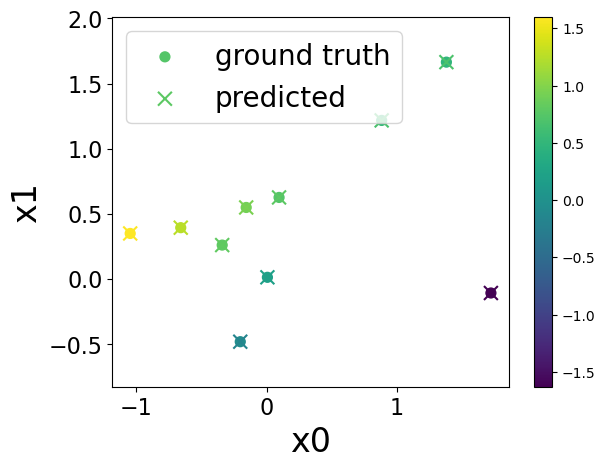

In [13]:
y_p_trained = x @ (w0, w1)

plot_pred_2d(x, y_gt, y_p_trained)

## Testing

We now check how the trained neuron works on the test data.

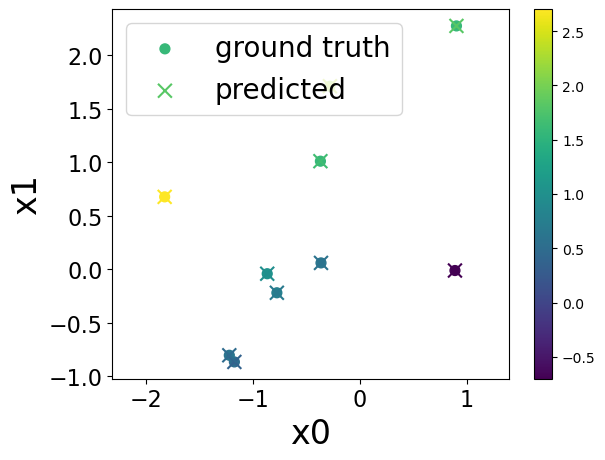

In [15]:
(x_test, y_gt_test) = load_data(filename="data_reg_2d_clean_test.csv")

y_p_trained_test = x_test @ (w0, w1)

plot_pred_2d(x_test, y_gt_test, y_p_trained_test)